In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# load the data from csv file to Pandas DataFrame
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
train_df.shape

(891, 12)

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Cabin is not useful feature here, for us

# Dealing with missing values

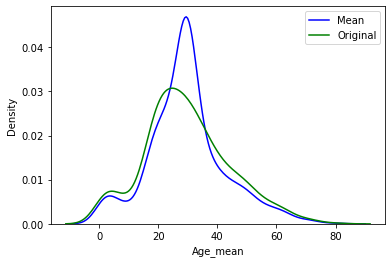

In [59]:
# first we compare between the curves for initial values and replaced - with - mean - values
train_df["Age_mean"] = train_df["Age"].fillna(train_df["Age"].mean())

# Checking difference of curves between replaced and original values
sns.kdeplot(train_df['Age_mean'],color='blue',label='Mean')
sns.kdeplot(train_df['Age'],color='green',label='Original')
                            
plt.legend ( )

Filling up the missing values does change the curve

In [60]:
train_df.drop(['Age_mean'],axis = 1,inplace = True)
#Now we replace them with mean
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())

In [61]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Dropping unnecessary columns from data

In [63]:
train_df.drop(['Cabin','Name','Ticket','Fare','PassengerId'],axis=1,inplace=True)
test_df.drop(['Cabin','Name','Ticket','Fare'],axis=1,inplace=True)

In [64]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


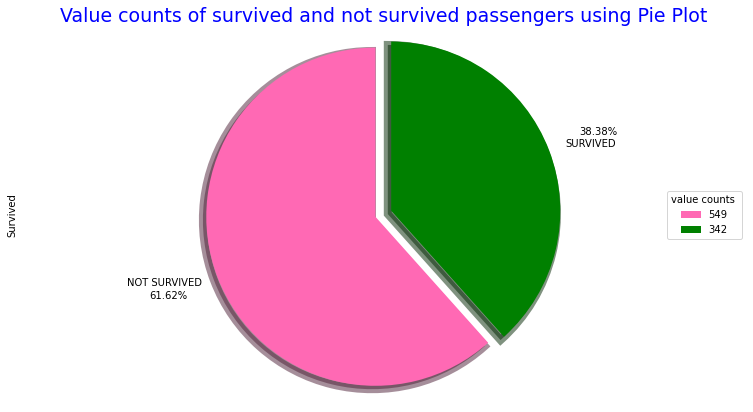

In [65]:
train_df["Survived"].value_counts().plot(kind= 'pie', figsize=(13,7),startangle=90,autopct = '%1.2f%%',
                                         shadow = True, labels=["NOT SURVIVED","SURVIVED"],pctdistance=1.31,
                                         wedgeprops = {'linewidth':8},
                                        colors = ["hotpink","green"],explode=[0.1,0])
plt.title("Value counts of survived and not survived passengers using Pie Plot",
          c = "b" , size = 19, y= 0.99)
plt.axis("equal")
plt.legend(title="value counts ",labels= train_df["Survived"].value_counts(),loc="center right")

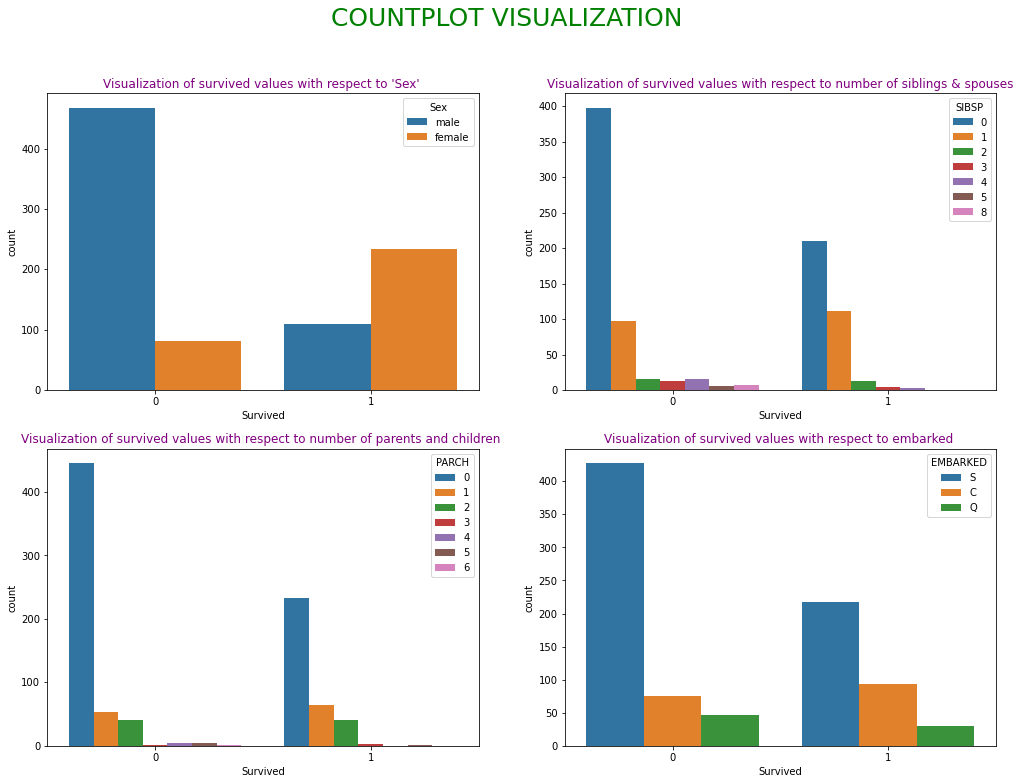

In [66]:
fig,axs = plt.subplots(nrows = 2 ,ncols = 2,figsize = (17,12));
fig.suptitle('COUNTPLOT VISUALIZATION',c='green',size=25)

sns.countplot("Survived",data=train_df,hue="Sex",ax=axs[0][0])
axs[0][0].set_title("Visualization of survived values with respect to 'Sex' ",c='purple')

sns.countplot("Survived", data=train_df, hue="SibSp",ax =axs[0][1])
axs[0][1].set_title("Visualization of survived values with respect to number of siblings & spouses", c = 'purple')
axs[0][1].legend(title='SIBSP',loc ='upper right')

sns.countplot("Survived", data =train_df,hue="Parch",ax = axs[1][0])
axs[1][0].set_title("Visualization of survived values with respect to number of parents and children " , c= 'purple')
axs[1][0].legend (title='PARCH',loc = 'upper right')

sns.countplot("Survived",data =train_df,hue="Embarked",ax=axs[1][1])
axs[1][1].set_title("Visualization of survived values with respect to embarked ",c = 'purple' )

axs[1][1].legend( title='EMBARKED',loc ='upper right')
plt.show()



In above graphs 0 represents Not Survival cases and 1 represents Survival cases
1. In first graph we can see that male passengers died more than females and also female passengers did survive more than males
2. In Second graph we can see that the number of passengers having no siblings or spouse survived more and also, died more.

# Bar Graph to represent number of Non-Survived Passengers with respect to each column

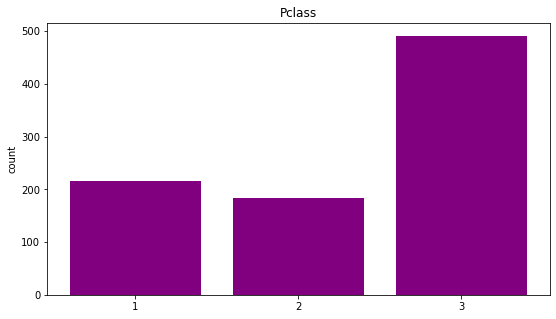

Pclass 
3    491
1    216
2    184
Name: Pclass, dtype: int64


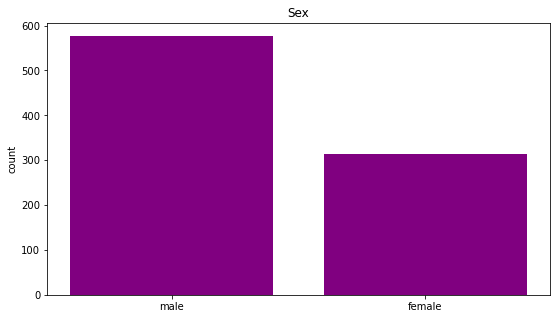

Sex 
male      577
female    314
Name: Sex, dtype: int64


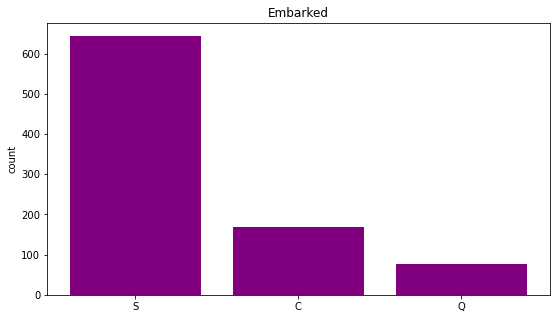

Embarked 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


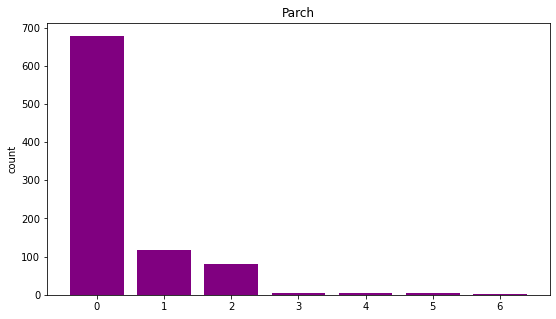

Parch 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


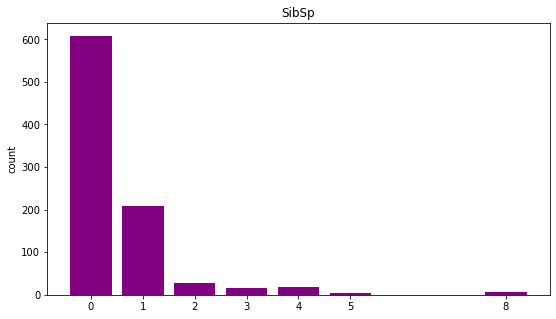

SibSp 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [67]:
def bar_graph(features):
    feature=train_df[features];
    feature_val =feature.value_counts();
    plt.figure(figsize = (9,5));
    plt.bar(feature_val.index , feature_val , color = 'purple' );
    plt.xticks(feature_val.index , feature_val.index.values );
    plt.title(features );
    plt.ylabel("count");
    plt.show();
    print ("{} \n{}".format(features,feature_val));
# Visualizing numbers of non-survived passengers from different features using barplot
cols =["Pclass" , "Sex" , "Embarked", "Parch", "SibSp"]
for i in cols:
    bar_graph(i)

1. We see here , passengers coming from 3rd class died more than others coming from 1st or 2nd classes .
Passengers of 1st class were likely to survive more than others.
2. Female passengers happend to survive more than male passengers.
3. Also, passengers having neither any sibling nor any spouse happend to die more than others.

In [68]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

In [69]:
lben=LabelEncoder()

train_df["Sex"] = lben.fit_transform(train_df["Sex"].values)
train_df["Embarked"] = lben.fit_transform(train_df["Embarked"].values)

test_df["Sex"] = lben.fit_transform(test_df["Sex"].values)
test_df["Embarked"] = lben.fit_transform(test_df["Embarked"].values)

In [70]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


# Splitting data for test and train

In [77]:
X = train_df.iloc[ :, 1:7]
Y = train_df.loc[ :,'Survived']
#X_test = test_df.drop("PassengerId",axis = 1)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [80]:
sc_object = StandardScaler()
X_train = sc_object.fit_transform(X_train)
X_test = sc_object.transform(X_test)

# Applying algorithms

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
#LOGISTIC REGRESSION MODEL
l_regression = LogisticRegression()
l_regression.fit(X_train,Y_train)

#DECISION TREE MODEL
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)

#RANDOMFOREST MODEL
r_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
r_forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

# Prediction Probabilities

In [90]:
r_probs = [0 for _ in range(len(Y_test))]
l_regression_probs = l_regression.predict_proba(X_test)
d_tree_probs = d_tree.predict_proba(X_test)
r_forest_probs = r_forest.predict_proba(X_test)

Probabilities for the positive outcome is kept

In [91]:
l_regression_probs= l_regression_probs[:,1]
d_tree_probs= d_tree_probs[:,1]
r_forest_probs = r_forest_probs[:,1]

# Computing AUROC and ROC curve values

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

In [94]:
r_auc = roc_auc_score(Y_test, r_probs)
lg = roc_auc_score(Y_test, l_regression_probs)
dt = roc_auc_score(Y_test, d_tree_probs)
rf = roc_auc_score(Y_test, r_forest_probs)

In [96]:
print( 'Random ( chance ) Prediction : AUROC = %.3f ' %( r_auc ) )
print( 'Logistic Regression : AUROC = %.3f '%(lg))
print( 'Decision Tree : AUROC = %.3f '%(dt))
print( 'Random Forest : AUROC = %.3f '%(rf))

Random ( chance ) Prediction : AUROC = 0.500 
Logistic Regression : AUROC = 0.827 
Decision Tree : AUROC = 0.746 
Random Forest : AUROC = 0.813 


In [97]:
r_fpr , r_tpr , _ = roc_curve( Y_test , r_probs)
lg_fpr , lg_tpr, _ =roc_curve(Y_test ,l_regression_probs)
dt_fpr , dt_tpr, _ =roc_curve(Y_test, d_tree_probs )
rf_fpr , rf_tpr, _ =roc_curve(Y_test, r_forest_probs)
                    
                    

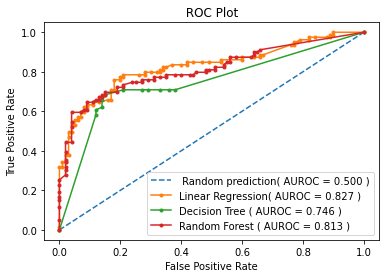

In [104]:
plt.plot( r_fpr , r_tpr ,linestyle='--', label = ' Random prediction( AUROC = %0.3f )' % r_auc)
plt.plot( lg_fpr , lg_tpr, marker ='.', label = 'Linear Regression( AUROC = %0.3f )' % lg )
plt.plot( dt_fpr , dt_tpr , marker ='.' , label = 'Decision Tree ( AUROC = %0.3f ) ' % dt )
plt.plot( rf_fpr , rf_tpr , marker ='.' , label = 'Random Forest ( AUROC = %0.3f ) ' % rf )

plt.title( ' ROC Plot ' )
#Axis labels
plt.xlabel( 'False Positive Rate')
plt.ylabel( f'True Positive Rate')
#Show legend
plt.legend() #
#Show plot
plt.show()                 

We can see that out of 3 model Linear Regression is performing better.

So, we choose Linear Regression model for prediction

In [105]:
#Using Test Values

final = l_regression.predict(X_test)

In [109]:
print(final)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [111]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(Y_test, final)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329
